# Redes Neuronales

In [36]:
# Cargar librerias para ciencia de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Utilidades
import os

# Modelos de redes neuronales en sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Modelos de random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Función para dividir los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Validación modelos de clasificación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Validación modelos de regresión
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from yellowbrick.regressor import prediction_error

# Conjunto de datos para regresión
from sklearn.datasets import load_digits

In [37]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Analitica de Datos UJaveriana')

# Verificar los archivos de las carpetas
!ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
'1. Analisis Exploratorio.ipynb'		      canasta_productos.csv
'2. Modelo de Regresion.ipynb'			      credit_card_default.csv
 3_Regresion_Logistica.ipynb			      cupones.csv
 3.Regresion_Logistica_Solucion.ipynb		      cupones.xlsx
 4.Arbole_Decision.ipynb			      gastos_medicos.xlsx
 4.Arbole_Decision_Solucion.ipynb		      graficas_analisis_presentacion.ipynb
 5.Metodos_Ensamble.ipynb			      incumplimiento_credito.csv
 5.Metodos_Ensamble_Solucion.ipynb		      Modelos_Machine_Learning.ipynb
 6.SVM_KNN.ipynb				      predicciones.xlsx
'7. PCA_Clustering_ReglasAsociacion_Solucion.ipynb'   publicidad.csv
'8. Redes_neuronales.ipynb'			      Taller_Regresion_Lineal.ipynb
 arrestos.csv					      USArrestos.csv
 bank_marketing.csv				      wholesale_customers_data.csv


# Clasificación

## Conjunto MNIST

El conjunto de datos MNIST es uno de los conjuntos de datos más icónicos y ampliamente utilizados en el campo de la visión por computadora y el aprendizaje automático. MNIST es un acrónimo de "Modified National Institute of Standards and Technology," y representa una versión modificada de un conjunto de datos originalmente recopilado por el Instituto Nacional de Estándares y Tecnología de los Estados Unidos (NIST).

MNIST se ha convertido en un referente en el campo del reconocimiento de dígitos escritos a mano. Consiste en un conjunto de 70,000 imágenes en escala de grises de dígitos manuscritos del 0 al 9, recopilados de escritura manual de empleados y estudiantes de la oficina de censo de los Estados Unidos. Cada imagen tiene una resolución de 28x28 píxeles.

Este conjunto de datos ha sido utilizado durante décadas para evaluar y desarrollar algoritmos de clasificación y reconocimiento de patrones. MNIST es conocido por su simplicidad y, al mismo tiempo, por su relevancia, ya que proporciona una base sólida para comprender y experimentar con técnicas de procesamiento de imágenes y aprendizaje automático, lo que lo convierte en un punto de partida ideal para quienes deseen adentrarse en el mundo de la visión por computadora y las redes neuronales.

Para ilustrar el uso de redes en el reconocimiento de imagenes hemos tomado el data que esta contenido en la libreria sklearn el cual contienen imagenes 8X8 píxeles y una muestra de cerca de 1800 imagenes.

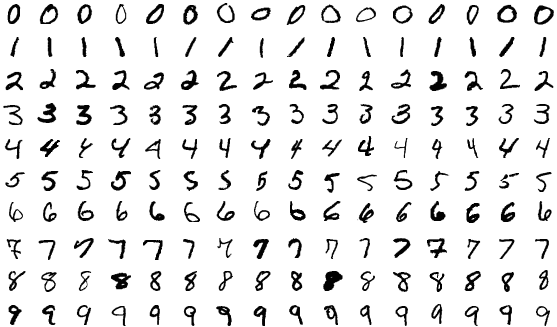

In [38]:
# Cargar el objeto que contiene toda la información del data set
digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


Las imágenes se representan comúnmente en forma de matrices o arreglos (arrays) en el ámbito de la visión por computadora y el procesamiento de imágenes. La forma específica de la matriz depende de si se trata de una imagen en escala de grises o una imagen en color.

1. **Imágenes en Escala de Grises:** Cada píxel se representa con un solo valor numérico que indica la intensidad del nivel de gris. La imagen se representa como una matriz bidimensional, donde cada elemento contiene valores entre 0 y 255.

2. **Imágenes en Color (RGB):** Las imágenes en color utilizan tres canales: rojo (R), verde (G) y azul (B) para cada píxel. Se representan como una matriz tridimensional, donde cada elemento contiene valores para los canales R, G y B.

In [39]:
# Representación matricial de las 4 primeras imagenes en una escala de grises
digits.images[0:4]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]],

       [[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
        [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
        [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0

In [40]:
# Los dígitos que representan
digits.target[0:4]

array([0, 1, 2, 3])

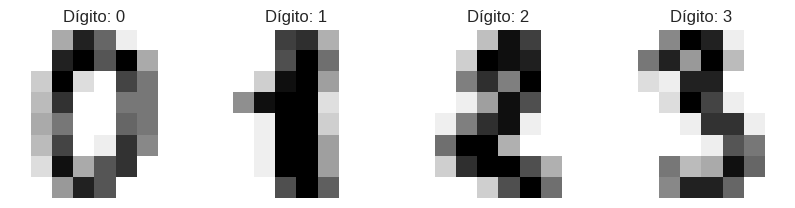

In [41]:
# Imagen de los primeros 4 dígitos en una resolución de 8X8 píxeles
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, digit in zip(axes, digits.images[0:4], digits.target[0:4]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Dígito: {digit}")

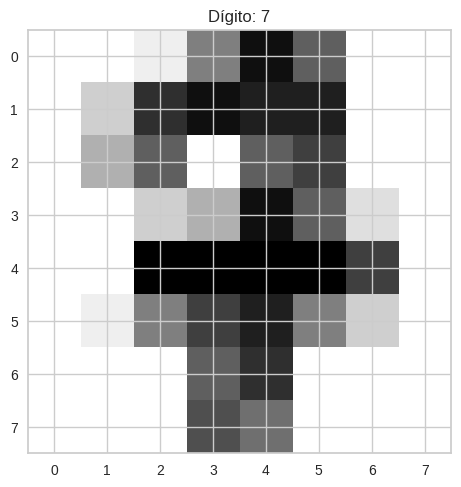

In [42]:
# Mostrar un dígito en particular
pos = 17
plt.imshow(digits.images[pos], cmap=plt.cm.gray_r)
plt.title(f"Dígito: {digits.target[pos]}")
plt.show()

**Aplanar las imágenes:** La mayoría de los modelos de clasificación requieren que las imágenes se aplanen en un formato unidimensional. Esto significa que cada imagen de 8x8 píxeles (8 filas por 8 columnas) se convierte en un vector de 64 valores.

In [43]:
# Aplanar las primeras cuatro imagenes
pd.DataFrame(digits.images[0:4].reshape((4,-1)))

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0


In [44]:
# Aplanar todas imagenes
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Dividir los datos en train test
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, stratify = digits.target
)

# Escalar los datos al máximo valor del conjunto de entrenamiento
X_train = X_train/X_train.max()
X_test = X_test/X_train.max()

In [45]:
X_train

array([[0.    , 0.    , 0.    , ..., 0.1875, 0.    , 0.    ],
       [0.    , 0.    , 0.25  , ..., 0.6875, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.0625, 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.75  , 0.4375, 0.    ],
       [0.    , 0.    , 0.5625, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.5625, 0.    , 0.    ]])

In [46]:
y_train

array([4, 0, 4, ..., 6, 7, 1])

## Multilayer perceptron

Para este modelo tenemos los siguientes parámetros:

* hidden_layer_sizes: Es una tupla que representa la cantidad de neuronas en cada capa. Ej: (2,3), significa dos capas, la primera con 2 neuronas y la segunda con 3 neuronas.
* activation: Es la función de activación para las capas ocultas.
* solver: El optimizador que va a determinar los pesos en cada neurona.
* alpha: Parámetro para la regularización.
* batch_size: Cantidad de registros utilizados en las iteraciones de la optimización.
* learning_rate: Se utiliza en los optimizadores adam y sgd, se utiliza para controlar la velocidad con la que se ajustan los pesos en cada iteración.
* max_iter: Cantidad de iteraciones máximas para llegar al óptimo.

In [47]:
# hidden_layer_sizes = (20,10)
# Capa 1: 20 neuronas
# Capa 2: 10 neuronas
mlp = MLPClassifier(hidden_layer_sizes=(20,10), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000, random_state=42)

In [48]:
# Generar predicciones
y_pred = mlp.predict(X_test)
predicciones = pd.DataFrame(
    {'y_test':y_test,
     'y_pred':y_pred}
)
# Predicciones erroneas
errores = predicciones.loc[predicciones['y_test'] != predicciones['y_pred']]
errores

,y_test,y_pred
12,8,3
32,4,0
42,0,7
59,7,9
71,9,1
90,8,3
117,7,9
123,9,3
144,8,1
151,8,4


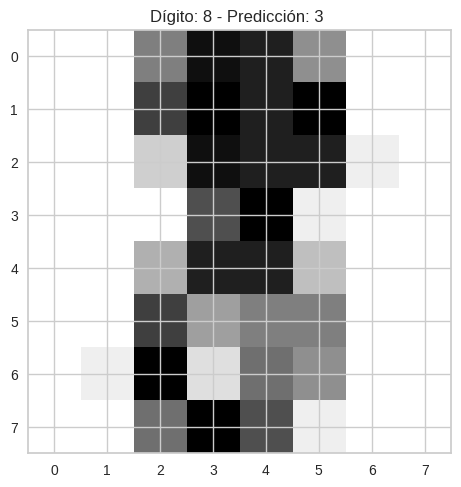

In [49]:
# Mostrar el primer error
pos = errores.index[0]
plt.imshow(X_test[pos].reshape((8,8)), cmap=plt.cm.gray_r)
plt.title(f"Dígito: {y_test[pos]} - Predicción: {y_pred[pos]} ")
plt.show()

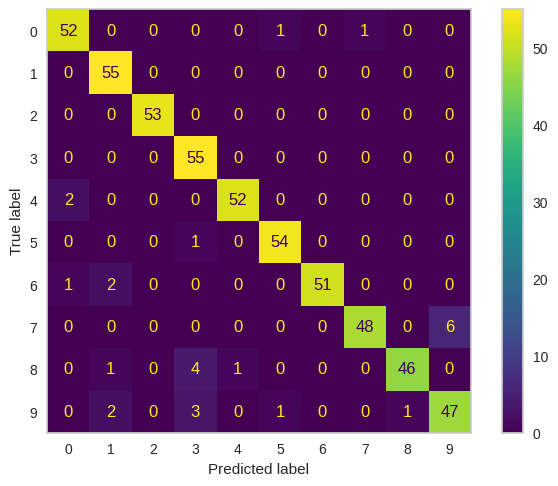

In [50]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.grid(False)

In [51]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.92      1.00      0.96        55
           2       1.00      1.00      1.00        53
           3       0.87      1.00      0.93        55
           4       0.98      0.96      0.97        54
           5       0.96      0.98      0.97        55
           6       1.00      0.94      0.97        54
           7       0.98      0.89      0.93        54
           8       0.98      0.88      0.93        52
           9       0.89      0.87      0.88        54

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



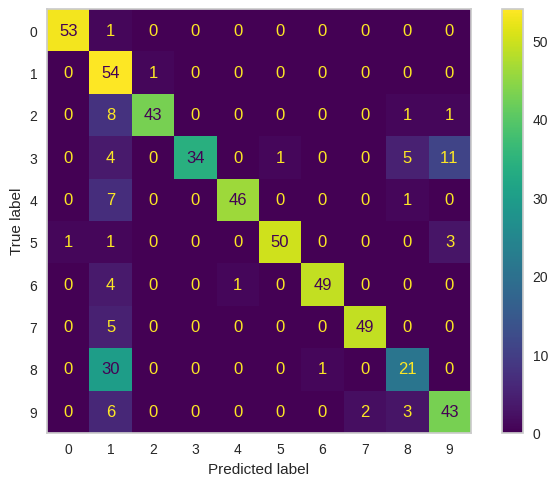

In [52]:
# Clasificador Random Forest
rf = RandomForestClassifier(random_state=7)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.grid(False)

In [53]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.45      0.98      0.62        55
           2       0.98      0.81      0.89        53
           3       1.00      0.62      0.76        55
           4       0.98      0.85      0.91        54
           5       0.98      0.91      0.94        55
           6       0.98      0.91      0.94        54
           7       0.96      0.91      0.93        54
           8       0.68      0.40      0.51        52
           9       0.74      0.80      0.77        54

    accuracy                           0.82       540
   macro avg       0.87      0.82      0.83       540
weighted avg       0.87      0.82      0.83       540



# Regresión

Ahora vamos entrenar una red neuronal para un problema de regresión utilizando el caso de los gastos médicos.

In [54]:
# Cargar datos
data = pd.read_excel('gastos_medicos.xlsx')
data.head()

,sexo,edad,hijos,region,imc,fumador,gastos
0,mujer,19,0,suroccidente,27.900,si,16884.92
1,hombre,18,1,suroriente,33.770,no,1725.55
2,hombre,28,3,suroriente,33.000,no,4449.46
3,hombre,33,0,noroccidente,22.705,no,21984.47
4,hombre,32,0,noroccidente,28.880,no,3866.86


In [55]:
# Dividir X, Y
X = data.drop(columns=['gastos'])

# Escalar las variables edad e imc
X['edad'] = (X['edad'] - np.mean(X['edad']))/np.std(X['edad'])
X['imc'] = (X['imc'] - np.mean(X['imc']))/np.std(X['imc'])

# Generar las dummies
X = pd.get_dummies(X)

Y = data['gastos']

In [56]:
# Dividir el conjunto en train test


In [57]:
# Crear una red neuronal de dos capas:
# Capa 1: 12 neuronas
# Capa 2: 8 neuronas


# Entrenar la red neuronal



In [58]:
# Genere predicciones


In [59]:
# Analice las predicciones
# visualizer = prediction_error(MLPRegressor(hidden_layer_sizes=(12,8), activation='relu', solver='adam', max_iter=3000, random_state=42),
#                              X_train, y_train, X_test, y_test)

In [60]:
# MSE


In [61]:
# RMSE


In [62]:
# MAPE
